In [42]:
from math import e
import numpy as np
import matplotlib.pyplot as plt

# Theory

The ACT-REM model predicts that the total amount of activation for a memory is given by:

$A(m) = B(m) + S(m) + \log I(m) - \log(\overline{I})$

where $\log(\overline{I})$ is the mean emotional intensity of all other chunks that are _not_ $m$. 

## Basic fear generalization

In the AX+, BX- paradigm, individuals experience a number of compound trials that are either associated with a shock (_AX+_) or not (_BX-_). Fear generalization is measured as the probability of a startle response upon perceiving either a stimulus previous not associated with a shock (_BX-_) or a previous unseen compound (_AB_). The generalization is supposed to reflect the association of _X_ or _A_ to the startle response.

In ACT-R this is easily modeled as an effect of spreading activation: Because _X_ and _A_ are common to all episodes that contain a shock, there is a residual probability of retrieving a _AX+_ memory even in front of a _BX-_ or _AB_ prompt.

Specifically, the probability of retrieving _AX+_ over _BX-_ is given by the equation:

$ P(+) = \frac{e^{A(AX+}}{e^{A(AX+)} + e^{A(BX-)}} $

which can be simplified as 

$ P(+) = \frac{1}{1 + e^{A(BX-)-A(AX+)}} $

The difference in activation $e^{A(BX-)-A(AX+)}$ is due to a variety of factors, including spreading activation $S(m)$ and emotional intensity of the startle $log I(m)$. When presenting a neutral (BX-) or novel (AB) stimulus, the spreading activation components are identical for _AX+_ and _BX-_, indicating that the probability of retrieving a startle response depends only on $log I(AX^+)$, the emotional intensity of the shock episode. As $I(AX+)$ increases so does its genralization to neutral stimuli 


Text(0, 0.5, 'P(startle)')

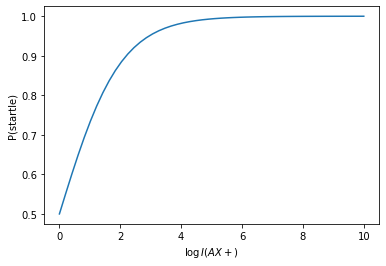

In [53]:
def generalization(i):
    return 1/(1 + e**-i)

x = np.linspace(0, 10)
p = generalization(x)
plt.plot(x, p)
plt.xlabel(r'$\log I(AX+)$')
plt.ylabel(r'P(startle)')

## Effect of previous trauma and PTSD on fear generalization

An interesting effect is that PTSD _increases_ fear generalization. In our model, this is due to the residual effect of $\log \overline{I}$. When we are retrieving an event that is _not_ the traumatic event itself, the quantity $log \overline{I}$ includes the emotional intensity of the traumatic event itself, which is typically much larger than that of any other memory and, therefore, cannot be ignored.

This quantity is subtracted from the activation of both shock (AX+) and non-shock episodes (BX-). Under these circumstances, the probability of retrieving _AX+_ over _BX-_ changes, and is the linear combination of three disjoint events that might happen:

* If $\log \overline{I}$ is smaller than $A(BX-)$, then the probability is the same as above
* But, if the threshold $\log \overline{I}$ is comparable or larger than $A(BX-)$, then only _AX1_ can be retrieved, guaranteeing a startle response. This can be modeled as the probability that the thrshold $\overline{I}$ is greater than $A(BX1)$.
* Finally, if $\log \overline{I}$ is greater than $A(AX+)$, no startle response is generated.

These three events are disjoint, so we sum the probabilities together. Let's indicate $\log \overline{I}$ as $T$, $A(AX+)$ as $A+$, and $A(BX-)$ as $A-$:

$P(startle) = P(A+ > A-) + P(T > A-) - P(T > A+)$

which can be expressed as:

$P(startle) = \frac{1} {1 + e^{A- - A+}} + \frac{1} {1 + e^{A- - T}} - \frac{1} {1 + e^{A+ - T}}$

We will also assume that $A^+ - A^- \approx \log(I)$.

Text(0.5, 1.0, 'Effects of previous trauma on fear generalization')

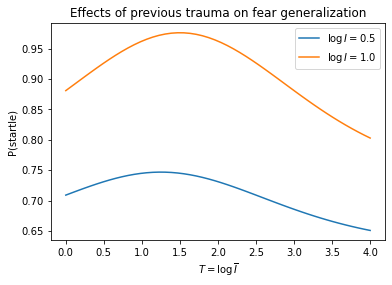

In [61]:
def prob_startle(mu, i, k):
    return 1/(1 + e**(-1*i)) + 1/(1 + e**(k - mu)) - 1/(1 + e**(k + i - mu))

x = np.linspace(0, 4)
p1 = prob_startle(x, i = 0.5, k=1)
p2 = prob_startle(x, i = 1, k=1)
plt.plot(x, p1)
plt.plot(x, p2)
plt.legend([r'$\log I = 0.5$', r'$\log I = 1.0$'])
plt.xlabel(r'$T = \log \overline{I}$')
plt.ylabel(r'P(startle)')
plt.title("Effects of previous trauma on fear generalization")

Note that the probability initially increases as the average value of $T$ increases. This means that, in the presence of previous trauma, fear generalization will be magnified.

Note also that, beyond a certain value of $T$, the effect starts declining. For large values of _T_ the lack of startle due to the retrieval of _AX+_ is offset by the probahbility of retrieving the traumatic event itself. 